# Data Preprocessing

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.



- When creating a machine learning project, it is not always a case that we come across the clean and formatted data.



- And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.

In [ ]:
import pandas as pd
s = pd.Series(['10','20','30'])
s

0    10
1    20
2    30
dtype: object

In [ ]:
s.astype(int)+100

0    110
1    120
2    130
dtype: int32

# What is the need of Data Preprocessing?

o A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models.


o Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

#### It involves below steps:

    Finding Missing Data
    Encoding Categorical Data
    Splitting dataset into training and test set
    Feature scaling


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#country , age and salary
data = [['India',np.nan,68000.0],
    ['France',43.0,45000.0],
 [np.nan,30.0, 54000.0],
 ['France' ,48.0, 65000.0],
 ['Germany' ,40.0, np. nan],
 ['India' ,35.0, 58000.0],
 ['Germany', np.nan ,53000.0],
 ['France' ,49.0, 79000.0],
 ['India', 50.0 ,88000.0],
 [np.nan ,37.0, np.nan]]


In [ ]:
df = pd.DataFrame(data)
df

,0,1,2
0,India,NaN,68000.0
1,France,43.0,45000.0
2,NaN,30.0,54000.0
3,France,48.0,65000.0
4,Germany,40.0,NaN
5,India,35.0,58000.0
6,Germany,NaN,53000.0
7,France,49.0,79000.0
8,India,50.0,88000.0
9,NaN,37.0,NaN


In [ ]:
#Assignment: Convert above DataFrame into csv file and check what happens to NaN values

In [ ]:
#check null values
df.isna().sum()

0    2
1    2
2    2
dtype: int64

In [ ]:
#Assiggnment: check library missingno
# Plot the NaN present in your dataset

# Ways to handle missing data:

#### There are mainly two ways to handle missing data, which are:

- *By deleting the particular row:* The first way is used to commonly deal with null values. In this way, we just delete the specific row or column which consists of null values. But this way is not so efficient and removing data may lead to loss of information which will not give the accurate output.




- *By calculating the mean:* In this way, we will calculate the mean of that column or row which contains any missing value and will put it on the place of missing value. This strategy is useful for the features which have numeric data such as age, salary, etc. Here, we will use this approach.

In [ ]:
df.fillna('missing')

,0,1,2
0,India,missing,68000.0
1,France,43.0,45000.0
2,missing,30.0,54000.0
3,France,48.0,65000.0
4,Germany,40.0,missing
5,India,35.0,58000.0
6,Germany,missing,53000.0
7,France,49.0,79000.0
8,India,50.0,88000.0
9,missing,37.0,missing


In [ ]:
# only use first column to fill missing entries
df.iloc[:,0].fillna('unknown')

0      India
1     France
2    unknown
3     France
4    Germany
5      India
6    Germany
7     France
8      India
9    unknown
Name: 0, dtype: object

In [ ]:
# second column we have is age hence we need to replace
# NaN values using average(mean) age
df.iloc[:,1].mean()

41.5

In [ ]:
#this is age column hence we have to fill using mean()
# df.iloc[:,1].mean()
df.iloc[:,1].fillna(42)

0    42.0
1    43.0
2    30.0
3    48.0
4    40.0
5    35.0
6    42.0
7    49.0
8    50.0
9    37.0
Name: 1, dtype: float64

In [ ]:
# ffill/pad---> forward filling
#df.iloc[:,1].fillna(method='ffill')
df.iloc[:,1].fillna(method='pad')

0     NaN
1    43.0
2    30.0
3    48.0
4    40.0
5    35.0
6    35.0
7    49.0
8    50.0
9    37.0
Name: 1, dtype: float64

In [ ]:
df.iloc[:,2].fillna(method='ffill')

0    68000.0
1    45000.0
2    54000.0
3    65000.0
4    65000.0
5    58000.0
6    53000.0
7    79000.0
8    88000.0
9    88000.0
Name: 2, dtype: float64

In [ ]:
# bfill/backfill --> backward filling means fill Nan by taking bottom value
df.iloc[:,1].fillna(method='bfill')

0    43.0
1    43.0
2    30.0
3    48.0
4    40.0
5    35.0
6    49.0
7    49.0
8    50.0
9    37.0
Name: 1, dtype: float64

In [ ]:
df.iloc[:,2].fillna(method='bfill')

0    68000.0
1    45000.0
2    54000.0
3    65000.0
4    58000.0
5    58000.0
6    53000.0
7    79000.0
8    88000.0
9        NaN
Name: 2, dtype: float64

In [ ]:
df.iloc[:,0].value_counts()

India      3
France     3
Germany    2
Name: 0, dtype: int64

In [ ]:
df.iloc[:,0].mode()

0    France
1     India
dtype: object

In [ ]:
df.iloc[:,0].fillna('India')

0      India
1     France
2      India
3     France
4    Germany
5      India
6    Germany
7     France
8      India
9      India
Name: 0, dtype: object

# SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer
#handling missing data (Replacing missing data with the mean value
#in respective column)

#create an object of SimpleImputer
si = SimpleImputer()
#Other missing examples: -999 -99 -1 -111 NA==> missing data

In [ ]:
"""
The imputation strategy.

    - If "mean", then replace missing values using the mean along
      each column. Can only be used with numeric data.
    - If "median", then replace missing values using the median along
      each column. Can only be used with numeric data.
    - If "most_frequent", then replace missing using the most frequent
      value along each column. Can be used with strings or numeric data.
      If there is more than one such value, only the smallest is returned.
    - If "constant", then replace missing values with fill_value. Can be
      used with strings or numeric data.
"""

In [ ]:
si

SimpleImputer()

In [ ]:
#Fitting imputer object to the independent variables x with numeric dtype
ndf = df.select_dtypes(exclude='object')
ndf

,1,2
0,NaN,68000.0
1,43.0,45000.0
2,30.0,54000.0
3,48.0,65000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,53000.0
7,49.0,79000.0
8,50.0,88000.0
9,37.0,NaN


In [ ]:
si.fit(ndf)

SimpleImputer()

In [ ]:
#fit means training
#it gives information about data u supplied
si.missing_values

nan

In [ ]:
si.n_features_in_

2

In [ ]:
si.strategy

'mean'

In [ ]:
ndf

,1,2
0,NaN,68000.0
1,43.0,45000.0
2,30.0,54000.0
3,48.0,65000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,53000.0
7,49.0,79000.0
8,50.0,88000.0
9,37.0,NaN


In [ ]:
#Replacing missing data with the calculated mean value using transform
si.transform(ndf)

array([[4.150e+01, 6.800e+04],
       [4.300e+01, 4.500e+04],
       [3.000e+01, 5.400e+04],
       [4.800e+01, 6.500e+04],
       [4.000e+01, 6.375e+04],
       [3.500e+01, 5.800e+04],
       [4.150e+01, 5.300e+04],
       [4.900e+01, 7.900e+04],
       [5.000e+01, 8.800e+04],
       [3.700e+01, 6.375e+04]])

In [ ]:
ndf.mean()

1       41.5
2    63750.0
dtype: float64

In [ ]:
# if we want to perform fit and transform together?
si.fit_transform(ndf)

array([[4.150e+01, 6.800e+04],
       [4.300e+01, 4.500e+04],
       [3.000e+01, 5.400e+04],
       [4.800e+01, 6.500e+04],
       [4.000e+01, 6.375e+04],
       [3.500e+01, 5.800e+04],
       [4.150e+01, 5.300e+04],
       [4.900e+01, 7.900e+04],
       [5.000e+01, 8.800e+04],
       [3.700e+01, 6.375e+04]])

In [ ]:
import seaborn as sns
t = sns.load_dataset('titanic')
t.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [ ]:
t[['age']].mean()

age    29.699118
dtype: float64

In [ ]:
si.fit_transform(t[['age']])

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [ ]:
t[['embarked','deck']].isna().sum()

embarked      2
deck        688
dtype: int64

In [ ]:
# we need to create a new object for str data
si2 = SimpleImputer(strategy='most_frequent')

In [ ]:
t[['embarked','deck']][:3]

,embarked,deck
0,S,NaN
1,C,C
2,S,NaN


In [ ]:
t[['embarked','deck']].mode()

,embarked,deck
0,S,C


In [ ]:
si2.fit_transform(t[['embarked','deck']])

array([['S', 'C'],
       ['C', 'C'],
       ['S', 'C'],
       ...,
       ['S', 'C'],
       ['C', 'C'],
       ['Q', 'C']], dtype=object)

# Encoding Categorical data:

- Categorical data is data which has some categories such as,  Country


- Since machine learning model completely works on mathematics and numbers, but if our dataset would have a categorical variable, then it may create trouble while building the model. So it is necessary to encode these categorical variables into numbers.

In [ ]:
df[0]

0      India
1     France
2        NaN
3     France
4    Germany
5      India
6    Germany
7     France
8      India
9        NaN
Name: 0, dtype: object

In [ ]:
df[0].unique()

array(['India', 'France', nan, 'Germany'], dtype=object)

In [ ]:
pd.DataFrame(['male','female','female']).replace({'male':0,'female':1})

,0
0,0
1,1
2,1


In [ ]:
# using replace--> Assignment
df[0].replace({})

In [ ]:
# using map


# sklearn.preprocessing

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df[0].values

array(['India', 'France', nan, 'France', 'Germany', 'India', 'Germany',
       'France', 'India', nan], dtype=object)

In [ ]:
lb = LabelEncoder()
#lets supply country data present at 0 index
lb.fit_transform(df[0])
#in above case labelencoder converted India as 2, France as 0 and germany as 1

array([2, 0, 3, 0, 1, 2, 1, 0, 2, 3])

In [ ]:
lb.classes_
#LabelEncoder follows Alphabatic order a-z

array(['France', 'Germany', 'India', nan], dtype=object)

In [ ]:
g = pd.DataFrame({'gender':['male','female','female','male','male','female'],
             'cat':['A','A','A','B','C','C']})
g

,gender,cat
0,male,A
1,female,A
2,female,A
3,male,B
4,male,C
5,female,C


In [ ]:
lb2 = LabelEncoder()
#labelEncoder accepts only 1D data
lb2.fit(g['gender'])

LabelEncoder()

In [ ]:
lb2.transform(g.gender)

array([1, 0, 0, 1, 1, 0])

In [ ]:
lb2.classes_

array(['female', 'male'], dtype=object)

In [ ]:
# will labelEncoder work on 2 columns
lb2.fit_transform(g)

ValueError: ignored

In [ ]:
lb2.classes_

array(['female', 'male'], dtype=object)

In [ ]:
data = ['female', 'male','female', 'male','female', 'male']
lb2.transform(data)

array([0, 1, 0, 1, 0, 1])

In [ ]:
data2 = [0,1,1,1,0,0,0,0,1]
#convert 0,1 into category
lb2.inverse_transform(data2)

array(['female', 'male', 'male', 'male', 'female', 'female', 'female',
       'female', 'male'], dtype=object)

In [ ]:
# i will use titanic dataset
# in which we have sex column will convert Male and Female in 1 and 0
import seaborn as sns
t = sns.load_dataset('titanic')
t['sex']

In [ ]:
#use lb2 to convert above series into 0 &1
lb2.fit_transform(t['sex'])

In [ ]:
new_data= [1,1,1,1,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,0,1]
new_data

In [ ]:
#Convert above 0 & 1 into Category male and female
lb2.inverse_transform(new_data)

In [ ]:
# Interview question:
# What are different ways to deal with Categorical data?
# How to convert categorical data using pandas
# how to convert categorical data using sklearn.preprocessing

# Dummy Variables:

- Dummy variables are those variables which have values 0 or 1.


- The 1 value gives the presence of that variable in a particular column, and rest variables become 0.


- With dummy encoding, we will have a number of columns equal to the number of categories.


In [ ]:
place = pd.DataFrame({'data':['Katraj','Camp','Hadapsar','Katraj','Katraj','Hadapsar','Camp','Camp','Hadapsar']})
place

,data
0,Katraj
1,Camp
2,Hadapsar
3,Katraj
4,Katraj
5,Hadapsar
6,Camp
7,Camp
8,Hadapsar


In [ ]:
# Convert above data in 0 and 1
# Camp Hadpsar Katraj
# [0,    0,      1]
# [1      0       0]

In [ ]:
place.data.unique()

array(['Katraj', 'Camp', 'Hadapsar'], dtype=object)

#### Wherever we have categorical data ina column, there u have to apply OneHotEncoder

In [ ]:
#Encoding for dummy variables using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ob = OneHotEncoder()

In [ ]:
convert = ob.fit_transform(place)
convert
#return sparse matrix

<9x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [ ]:
final = convert.toarray()
final

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
#check the sequence of conversion
ob.categories_

[array(['Camp', 'Hadapsar', 'Katraj'], dtype=object)]

In [ ]:
place[:2]

,data
0,Katraj
1,Camp


In [ ]:
final[:2]

array([[0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
#convert final into dataFrame
fin = pd.DataFrame(final,dtype=int)
d1 = pd.concat([place,fin],axis=1)
d1

,data,0,1,2
0,Katraj,0,0,1
1,Camp,1,0,0
2,Hadapsar,0,1,0
3,Katraj,0,0,1
4,Katraj,0,0,1
5,Hadapsar,0,1,0
6,Camp,1,0,0
7,Camp,1,0,0
8,Hadapsar,0,1,0


In [ ]:
d1.drop(columns='data',inplace=True)

In [ ]:
d1

,0,1,2
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0


In [ ]:
ob.categories_

[array(['Camp', 'Hadapsar', 'Katraj'], dtype=object)]

In [ ]:
d1.columns

Index([0, 1, 2], dtype='object')

In [ ]:
#rename columns
d1.columns= ob.categories_

In [ ]:
d1

,Camp,Hadapsar,Katraj
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0


## Using pandas: get_dummies()

#### alternative option and simple option to OneHot is get_dummies() of pandas

In [ ]:
place

,data
0,Katraj
1,Camp
2,Hadapsar
3,Katraj
4,Katraj
5,Hadapsar
6,Camp
7,Camp
8,Hadapsar


In [ ]:
pd.get_dummies(place)

,data_Camp,data_Hadapsar,data_Katraj
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,1,0
6,1,0,0
7,1,0,0
8,0,1,0


In [ ]:
pd.get_dummies(g['gender'])

,female,male
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0


#### Dummy Variable trap

In [ ]:
#How to deal with categorical data
# WHat are different encoding techniques?
# difference btween onehot and get_dummies
# what is dummy variable trap

# Feature Scaling

- Feature scaling is the final step of data preprocessing in machine learning.


- It is a technique to standardize the independent variables of the dataset in a specific range.


- In feature scaling, we put our variables in the same range and in the same scale so that no any variable dominate the other variable.

#age = 30,40,50
#salary = 65000,56000,150000,240000

### There are 2 types:
    - Standardization x-M(mue/meanofX)/sigma (std deviation)
    - Normalization x- min(x)/(max(x)-min(x))

### StandardScaler

In [ ]:
# StandardScaler   # x -mean(total_x)/std(total_x)
# -3 to +3

In [2]:
#load boston_housing dataset
import numpy as np
import pandas as pd

df = pd.read_csv('/content/boston.csv')
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [4]:
#load StandardScalar
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()

In [6]:
new = sc.fit_transform(df)
new

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [7]:
sc.mean_

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01, 2.25328063e+01])

In [8]:
sc.n_features_in_

14

In [9]:
#lets convert  new to df
ndf = pd.DataFrame(new)
ndf.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524


In [10]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [11]:
ndf.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,-1.123388e-16,1.00099,-0.419782,-0.410970,-0.390667,0.007397,9.933931
1,506.0,7.898820e-17,1.00099,-0.487722,-0.487722,-0.487722,0.048772,3.804234
2,506.0,2.106352e-16,1.00099,-1.557842,-0.867691,-0.211099,1.015999,2.422565
3,506.0,-3.510587e-17,1.00099,-0.272599,-0.272599,-0.272599,-0.272599,3.668398
4,506.0,-1.965929e-16,1.00099,-1.465882,-0.913029,-0.144217,0.598679,2.732346
5,506.0,-1.088282e-16,1.00099,-3.880249,-0.568630,-0.108466,0.482768,3.555044
6,506.0,-1.474446e-16,1.00099,-2.335437,-0.837448,0.317382,0.906798,1.117494
7,506.0,-8.425408e-17,1.00099,-1.267069,-0.805688,-0.279323,0.662371,3.960518
8,506.0,-1.123388e-16,1.00099,-0.982843,-0.637962,-0.523001,1.661245,1.661245
9,506.0,0.000000e+00,1.00099,-1.313990,-0.767576,-0.464673,1.530926,1.798194


<Axes: ylabel='Frequency'>

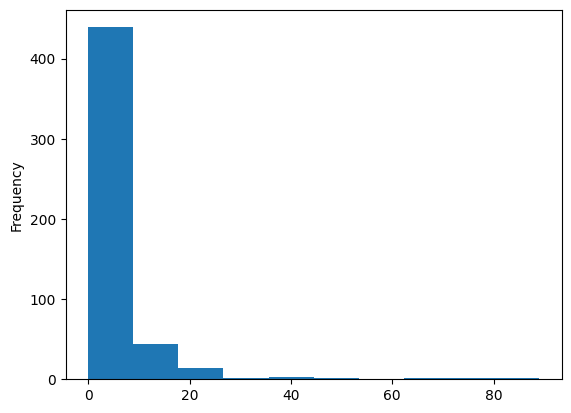

In [12]:
#now lets check hist plot of both
#df
df.CRIM.plot.hist()

<Axes: ylabel='Frequency'>

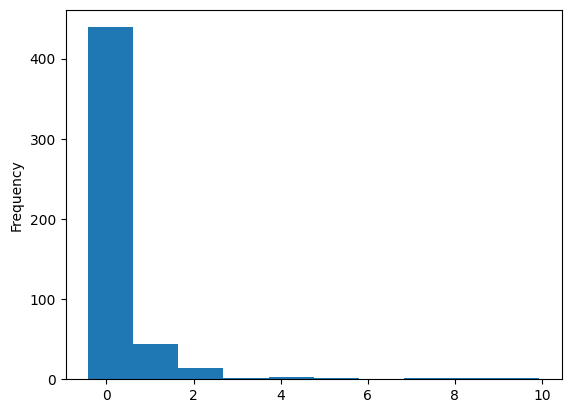

In [13]:
ndf[0].plot.hist()

<Axes: ylabel='Density'>

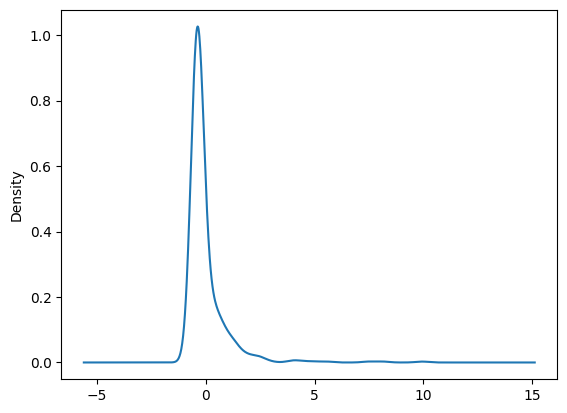

In [14]:
ndf[0].plot(kind='kde')

<Axes: ylabel='Density'>

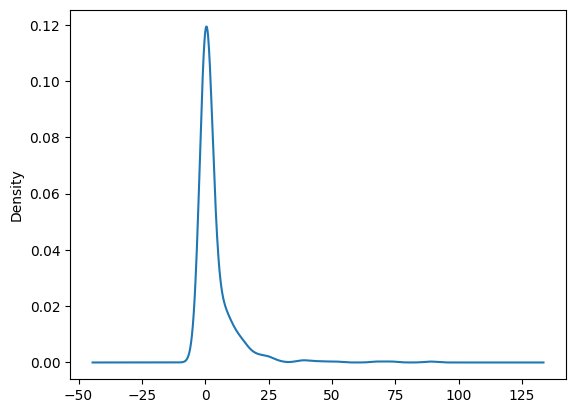

In [15]:
df['CRIM'].plot(kind='kde')

### MinMaxScaler

In [ ]:
# MinMaxScaler  # x- min(x)/(max(x)-min(x))
#range of minMax scalar is 0 to 1

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mx = MinMaxScaler()
norm = mx.fit_transform(df)
normdf = pd.DataFrame(norm)
normdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


<Axes: ylabel='Frequency'>

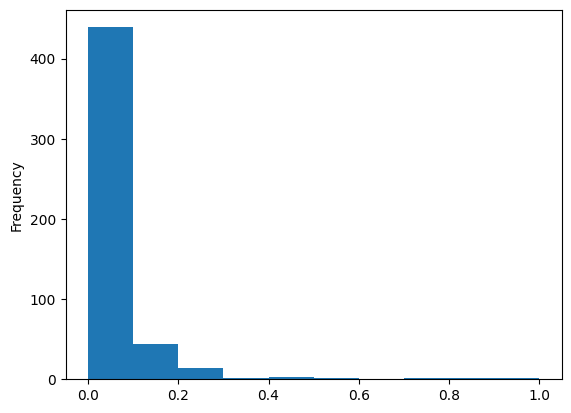

In [20]:
normdf[0].plot.hist()

<Axes: ylabel='Density'>

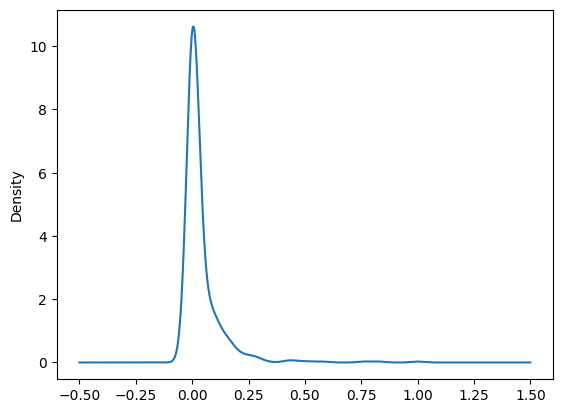

In [21]:
normdf[0].plot.kde()

### Q. When to use Standardscalar and Normalizer
### Q. Standardization vs Normalization
### Q. On which algorithms we can apply Standard scalar and Normalizer

### Binarizer

In [ ]:
# Binarizer is threshold based
# threshold is depends on condition
# if condition is True then convert samples to 1
# else 0
"""
Values greater than the threshold map to 1, while values less than
or equal to the threshold map to 0. With the default threshold of 0,
only positive values map to 1.
"""

In [22]:
from sklearn.preprocessing import Binarizer

In [23]:
#select target column from df
#which contains prices
out = df[['target']]
out.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [24]:
bi = Binarizer(threshold=28)
# values >28 ==>1
#values <=28 ==> 0

In [25]:
bi.fit_transform(out)

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [28]:
bi.transform([[26],[27],[33],[31],[23],[21],[56],[38]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Binarizer was fitted with feature names
  warnings.warn(


array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1]])

In [35]:
age = [18,20,33,16,11,8,5,37,89,45,27,12,15,16]
age = pd.DataFrame(age,columns=['age'])
age[:2]

,age
0,18
1,20


In [36]:
b2 = Binarizer(threshold=17)
b2.fit_transform(age)

array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]])